In [417]:
#importing libraries
import pandas as pd
import numpy as np

In [418]:
#reading data
train = pd.read_csv("C:/Users/Surya/Desktop/SURYA GEORGIAN/AIDI 1002 AI programming/Assignment 3/archive/train.csv")
test = pd.read_csv("C:/Users/Surya/Desktop/SURYA GEORGIAN/AIDI 1002 AI programming/Assignment 3/archive/test.csv")

In [419]:
train.head(10)

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A
5,461319,Male,Yes,56,No,Artist,0.0,Average,2.0,Cat_6,C
6,460156,Male,No,32,Yes,Healthcare,1.0,Low,3.0,Cat_6,C
7,464347,Female,No,33,Yes,Healthcare,1.0,Low,3.0,Cat_6,D
8,465015,Female,Yes,61,Yes,Engineer,0.0,Low,3.0,Cat_7,D
9,465176,Female,Yes,55,Yes,Artist,1.0,Average,4.0,Cat_6,C


In [420]:
#dropping the segmentation column from train set 
train = train.drop(["Segmentation","ID"], axis=1)
train.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4
1,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4
2,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6
3,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6
4,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6


In [421]:
# dropping all null values
train = train.dropna()
train.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4
2,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6
3,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6
5,Male,Yes,56,No,Artist,0.0,Average,2.0,Cat_6
6,Male,No,32,Yes,Healthcare,1.0,Low,3.0,Cat_6


#### Relabelling Var_1 column

In [422]:
#relabelling var_1 into three classes
train.loc[~train['Var_1'].isin(['Cat_4', 'Cat_6']), 'Var_1'] = 'other'

In [423]:
#checking distribuitions
distribution = train['Var_1'].value_counts()
print(distribution)

Cat_6    4476
other    1340
Cat_4     849
Name: Var_1, dtype: int64


In [424]:
# label encoding all the categorical variables
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
columns_to_encode = ['Gender', 'Ever_Married', 'Graduated', 'Profession', 'Spending_Score','Var_1']
for col in columns_to_encode:
    le.fit(train[col].unique())
    train[col] = le.transform(train[col])

In [425]:
train.head(10)

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,1,0,22,0,5,1.0,2,4.0,0
2,0,1,67,1,2,1.0,2,1.0,1
3,1,1,67,1,7,0.0,1,2.0,1
5,1,1,56,0,0,0.0,0,2.0,1
6,1,0,32,1,5,1.0,2,3.0,1
7,0,0,33,1,5,1.0,2,3.0,1
8,0,1,61,1,2,0.0,2,3.0,2
9,0,1,55,1,0,1.0,0,4.0,1
10,0,0,26,1,2,1.0,2,3.0,1
11,1,0,19,0,5,4.0,2,4.0,0


In [426]:
#Splitting the dataset
X = train.iloc[:,0:8].values
Y = train.iloc[:,8].values

In [427]:
#scaling X
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [428]:
#one-hot encoding Y
Y = pd.get_dummies(Y).values

In [429]:
#splitting the dataset into train and validation sets
from sklearn.model_selection import train_test_split
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.2, random_state=42)

### 1.1 Shuffling of dataset before training

In [269]:
# Shuffling the data
from sklearn.utils import shuffle
X_train, Y_train = shuffle(X_train, Y_train)

### 1.2 Design and Train a Neural network

In [270]:
#importing libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy

# Design the neural network model
model = Sequential()
model.add(Dense(8, activation='relu', input_shape=(8,)))
model.add(Dense(16, activation='relu'))
model.add(Dense(3, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, Y_train, epochs=200, batch_size=100, validation_data=(X_val,Y_val))


Epoch 1/200
54/54 [==============================] - 3s 16ms/step - loss: 1.0180 - accuracy: 0.5191 - val_loss: 0.9118 - val_accuracy: 0.6722
Epoch 2/200
54/54 [==============================] - 0s 6ms/step - loss: 0.8824 - accuracy: 0.6675 - val_loss: 0.8365 - val_accuracy: 0.6834
Epoch 3/200
54/54 [==============================] - 0s 6ms/step - loss: 0.8444 - accuracy: 0.6686 - val_loss: 0.8144 - val_accuracy: 0.6834
Epoch 4/200
54/54 [==============================] - 0s 7ms/step - loss: 0.8322 - accuracy: 0.6686 - val_loss: 0.8045 - val_accuracy: 0.6834
Epoch 5/200
54/54 [==============================] - 0s 6ms/step - loss: 0.8251 - accuracy: 0.6688 - val_loss: 0.7988 - val_accuracy: 0.6834
Epoch 6/200
54/54 [==============================] - 0s 6ms/step - loss: 0.8204 - accuracy: 0.6686 - val_loss: 0.7952 - val_accuracy: 0.6834
Epoch 7/200
54/54 [==============================] - 0s 5ms/step - loss: 0.8165 - accuracy: 0.6682 - val_loss: 0.7918 - val_accuracy: 0.6834
Epoch 8/200


### 1.3 Using validation data for model tuning and monitoring the f1-score while applying the early stopping logic from keras library.

In [271]:
# building a custom f1 function
from sklearn.metrics import f1_score
from tensorflow.keras.callbacks import EarlyStopping, Callback

class F1ScoreCallback(Callback):
    def __init__(self, X_train, y_train, X_val, y_val):
        super(F1ScoreCallback, self).__init__()
        self.X_train = X_train
        self.y_train = y_train
        self.X_val = X_val
        self.y_val = y_val

    def on_epoch_end(self, epoch, logs=None):
        y_train_pred = self.model.predict(self.X_train)
        y_train_pred_classes = np.argmax(y_train_pred, axis=1)
        y_train_classes = np.argmax(self.y_train, axis=1)
        train_f1 = f1_score(y_train_classes, y_train_pred_classes, average='weighted')

        y_val_pred = self.model.predict(self.X_val)
        y_val_pred_classes = np.argmax(y_val_pred, axis=1)
        y_val_classes = np.argmax(self.y_val, axis=1)
        val_f1 = f1_score(y_val_classes, y_val_pred_classes, average='weighted')

        logs['train_F1'] = train_f1
        logs['val_F1'] = val_f1
        print(f' - train_F1: {train_f1:.4f} - val_F1: {val_f1:.4f}')

In [272]:
# Design the neural network model
model = Sequential()
model.add(Dense(8, activation='relu', input_shape=(8,)))
model.add(Dense(16, activation='relu'))
model.add(Dense(3, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [273]:
# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=25, restore_best_weights=True)

# Create a f1 score callback instance
f1score_callback = F1ScoreCallback(X_train, Y_train, X_val, Y_val)

# Train the model with validation data and callbacks
history2 = model.fit(
    X_train,
    Y_train,
    epochs=200,
    batch_size=100,
    validation_data=(X_val, Y_val),
    callbacks=[F1ScoreCallback(X_train, Y_train, X_val, Y_val), early_stopping],
)

Epoch 1/200
42/42 [==============================] - 0s 2ms/step
 - train_F1: 0.5155 - val_F1: 0.5284
54/54 [==============================] - 3s 34ms/step - loss: 1.1926 - accuracy: 0.3321 - val_loss: 1.0051 - val_accuracy: 0.5581 - train_F1: 0.5155 - val_F1: 0.5284
Epoch 2/200
42/42 [==============================] - 0s 2ms/step
 - train_F1: 0.5422 - val_F1: 0.5575
54/54 [==============================] - 1s 24ms/step - loss: 0.9359 - accuracy: 0.6208 - val_loss: 0.8586 - val_accuracy: 0.6662 - train_F1: 0.5422 - val_F1: 0.5575
Epoch 3/200
42/42 [==============================] - 0s 3ms/step
 - train_F1: 0.5413 - val_F1: 0.5580
54/54 [==============================] - 1s 26ms/step - loss: 0.8602 - accuracy: 0.6664 - val_loss: 0.8195 - val_accuracy: 0.6842 - train_F1: 0.5413 - val_F1: 0.5580
Epoch 4/200
42/42 [==============================] - 0s 2ms/step
 - train_F1: 0.5440 - val_F1: 0.5597
54/54 [==============================] - 1s 23ms/step - loss: 0.8365 - accuracy: 0.6697 - val_

### 1.4 Using test data to calculate the appropriate classification metrics.

In [430]:
# reading test data
test = pd.read_csv("C:/Users/Surya/Desktop/SURYA GEORGIAN/AIDI 1002 AI programming/Assignment 3/archive/test.csv")
test.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,458989,Female,Yes,36,Yes,Engineer,0.0,Low,1.0,Cat_6
1,458994,Male,Yes,37,Yes,Healthcare,8.0,Average,4.0,Cat_6
2,458996,Female,Yes,69,No,NaN,0.0,Low,1.0,Cat_6
3,459000,Male,Yes,59,No,Executive,11.0,High,2.0,Cat_6
4,459001,Female,No,19,No,Marketing,NaN,Low,4.0,Cat_6


In [431]:
# preprocessing test data
test = test.drop(["ID"], axis=1)
test = test.dropna()
test.loc[~test['Var_1'].isin(['Cat_4', 'Cat_6']), 'Var_1'] = 'other'
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
columns_to_encode = ['Gender', 'Ever_Married', 'Graduated', 'Profession', 'Spending_Score','Var_1']
for col in columns_to_encode:
    le.fit(test[col].unique())
    test[col] = le.transform(test[col])
    
test.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,0,1,36,1,2,0.0,2,1.0,1
1,1,1,37,1,5,8.0,0,4.0,1
3,1,1,59,0,4,11.0,1,2.0,1
5,1,1,47,1,1,0.0,1,5.0,0
6,1,1,61,1,1,5.0,2,3.0,1


In [432]:
#dividing test data
X1 = test.iloc[:,0:8].values
Y1 = test.iloc[:,8].values

In [433]:
#scaling X1
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X1)
X1 = scaler.transform(X1)

In [434]:
#one-hot encoding Y1
Y1 = pd.get_dummies(Y1).values

In [279]:
y_pred = model.predict(X1)
y_test_class = np.argmax(Y1,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

68/68 [==============================] - 0s 2ms/step


In [280]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test_class,y_pred_class, target_names=le.classes_))
print (confusion_matrix(y_test_class,y_pred_class))

              precision    recall  f1-score   support

       Cat_4       0.55      0.11      0.19       320
       Cat_6       0.67      0.98      0.80      1421
       other       0.26      0.01      0.02       413

    accuracy                           0.67      2154
   macro avg       0.49      0.37      0.34      2154
weighted avg       0.58      0.67      0.56      2154

[[  36  280    4]
 [  16 1395   10]
 [  14  394    5]]


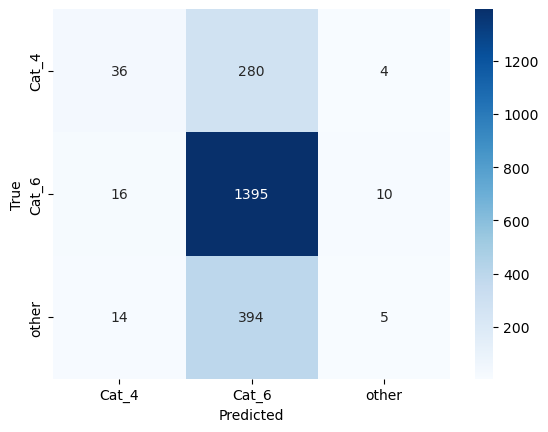

In [281]:
import matplotlib.pyplot as plt
import seaborn as sns
cm = confusion_matrix(y_test_class, y_pred_class)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

### 1.5 Significance of each metrices

Precision: Precision is the ratio of true positive predictions to the total number of positive predictions made by the model. In other words, it is the proportion of correctly predicted positive instances among all the instances that the model has predicted as positive. For example, for Cat_4, the precision is 0.55, which means that 55% of the instances predicted as Cat_4 are actually Cat_4.

Recall: Recall is the ratio of true positive predictions to the total number of actual positive instances in the dataset. In other words, it is the proportion of correctly predicted positive instances among all the instances that are actually positive. For example, for Cat_6, the recall is 0.98, which means that 98% of the actual Cat_6 instances have been correctly identified by the model.

F1-score: The F1-score is the harmonic mean of precision and recall, and it is used to combine the two metrics into a single score. A high F1-score indicates that the model has both high precision and high recall. For Cat_6, the F1-score is 0.80, which means that the model has a good balance between precision and recall for this category.

Support: Support is the number of instances of each category in the dataset.

Accuracy: Accuracy is the proportion of correct predictions made by the model over all predictions. In this case, the overall accuracy of the model is 0.67.

Macro Avg: Macro average is the unweighted average of precision, recall, and F1-score across all categories.

Weighted Avg: Weighted average is the weighted average of precision, recall, and F1-score across all categories, weighted by the number of instances of each category.

The confusion matrix shows the number of instances that were correctly classified (diagonal values) and the number of instances that were misclassified (off-diagonal values) for each category.

The model has high precision and recall for Cat_6 but low precision and recall for Cat_4 and other. The weighted average F1-score is 0.56, which indicates that the model's performance is mediocre overall. There are a few things the model could improve upon such as improving its predictions for Cat_4 and other categories to increase the overall accuracy of the model.
 
Row 2 corresponds to the true Cat_6 class. The first column of this row (16) represents the number of instances that were actually Cat_6 but were misclassified by the model as Cat_4. The second column (1395) represents the number of instances that were correctly classified as Cat_6 by the model. The third column (10) represents the number of instances that were actually Cat_6 but were misclassified by the model as other.

The model has a relatively high number of misclassifications for Cat_4 and other classes, which is consistent with the low precision and recall scores for these categories in the classification report.

### 1.6 Loss and f1-score curve for training and validation set

In [282]:
print(history2.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'train_F1', 'val_F1'])


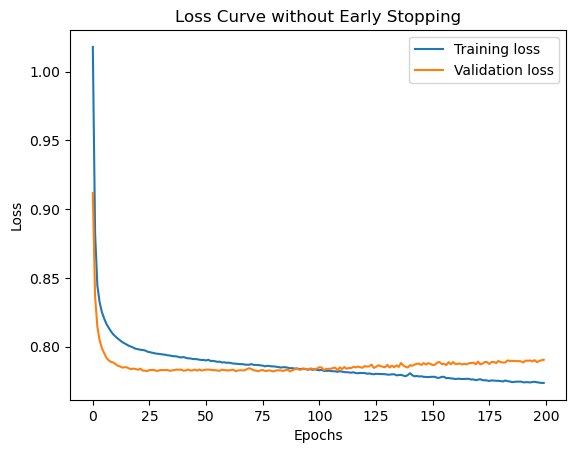

In [284]:
import matplotlib.pyplot as plt
# list all data in history
# Plot the loss curve
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Curve without Early Stopping')
plt.legend()
plt.show()

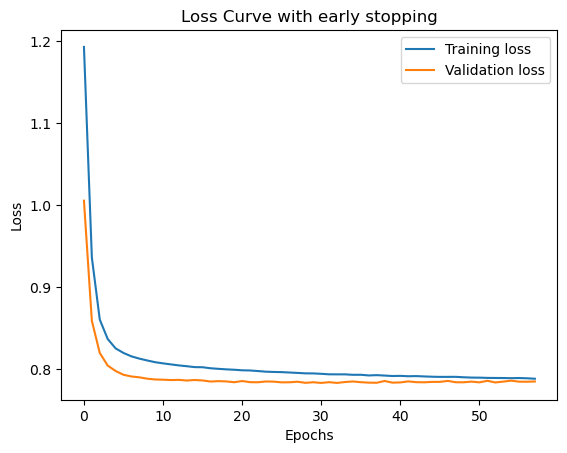

In [285]:
import matplotlib.pyplot as plt
# list all data in history
# Plot the loss curve
plt.plot(history2.history['loss'], label='Training loss')
plt.plot(history2.history['val_loss'], label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Curve with early stopping')
plt.legend()
plt.show()

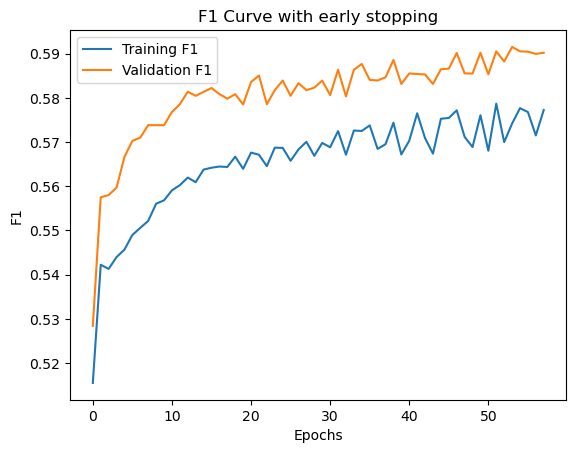

In [286]:
import matplotlib.pyplot as plt
# list all data in history
# Plot the loss curve
plt.plot(history2.history['train_F1'], label='Training F1')
plt.plot(history2.history['val_F1'], label='Validation F1')
plt.xlabel('Epochs')
plt.ylabel('F1')
plt.title('F1 Curve with early stopping')
plt.legend()
plt.show()

### 1.7 ROC-AUC curve

68/68 [==============================] - 0s 3ms/step


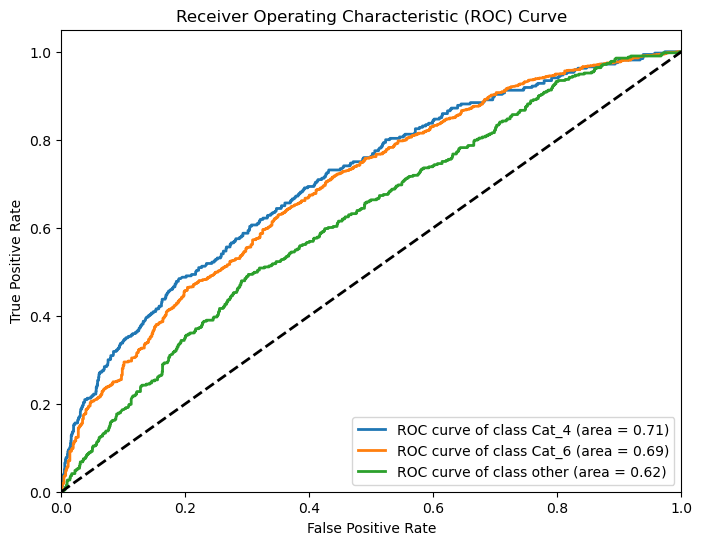

In [287]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Predict probabilities for the test data
y_pred_probs = model.predict(X1)
n_classes = len(le.classes_)

# Calculate TPR and FPR for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = Y1.shape[1]
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(Y1[:, i], y_pred_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot the ROC curve
plt.figure(figsize=(8, 6))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'.format(le.classes_[i], roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

#### Comment

The ROC curve is a graphical representation of the performance of a binary classification model as the discrimination threshold is varied. The curve is created by plotting the true positive rate (TPR) against the false positive rate (FPR) for different threshold values. The area under the ROC curve (AUC-ROC) is a summary metric that provides an overall measure of the model's ability to distinguish between positive and negative classes, with values ranging from 0 to 1. A higher AUC-ROC indicates better performance of the model.

the AUC-ROC values for the three classes are 0.71 for Cat_4, 0.69 for Cat_6, and 0.62 for other. These values indicate that the model's ability to distinguish between the positive and negative classes for Cat_4 and Cat_6 is moderately good, with AUC-ROC values of 0.71 and 0.69, respectively. However, the AUC-ROC value for the other class is relatively low, indicating that the model's performance in identifying the other class is poor.

Based on the AUC-ROC values, the model appears to perform reasonably well for Cat_4 and Cat_6 but may require further improvement for the other class.


#### Optimal threshold from the curve.

In [288]:
# Predict probabilities for the test data
y_pred_probs = model.predict(X1)
n_classes = len(le.classes_)

# Calculate TPR and FPR for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = Y1.shape[1]
for i in range(n_classes):
    fpr[i], tpr[i], thresholds = roc_curve(Y1[:, i], y_pred_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
# find the optimal threshold for each class
    optimal_idx = np.argmax(tpr[i] - fpr[i])
    optimal_threshold = thresholds[optimal_idx]
    print("Optimal threshold for class", le.classes_[i], ":", optimal_threshold)

68/68 [==============================] - 0s 2ms/step
Optimal threshold for class Cat_4 : 0.103200585
Optimal threshold for class Cat_6 : 0.67149734
Optimal threshold for class other : 0.23416404


### 1.8 Repeating the steps from 1.1 to 1.7 with sampling in training set.

In [545]:
#reading data
train = pd.read_csv("C:/Users/Surya/Desktop/SURYA GEORGIAN/AIDI 1002 AI programming/Assignment 3/archive/train.csv")
test = pd.read_csv("C:/Users/Surya/Desktop/SURYA GEORGIAN/AIDI 1002 AI programming/Assignment 3/archive/test.csv")

In [546]:
train = train.drop(["Segmentation","ID"], axis=1)
train = train.dropna()
train.loc[~train['Var_1'].isin(['Cat_4', 'Cat_6']), 'Var_1'] = 'other'

In [547]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
columns_to_encode = ['Gender', 'Ever_Married', 'Graduated', 'Profession', 'Spending_Score','Var_1']
for col in columns_to_encode:
    le.fit(train[col].unique())
    train[col] = le.transform(train[col])

In [548]:
#Splitting the dataset
X = train.iloc[:,0:8].values
Y = train.iloc[:,8].values

In [549]:
#scaling X
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [550]:
#one-hot encoding Y
Y = pd.get_dummies(Y).values

In [551]:
#splitting the dataset into train and validation sets
from sklearn.model_selection import train_test_split
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.2, random_state=42)

#### Sampling

In [552]:
from imblearn.over_sampling import SMOTE
# Apply SMOTE to oversample the training dataset
smote = SMOTE()
X_train, Y_train = smote.fit_resample(X_train, Y_train)
X_val, Y_val = smote.fit_resample(X_val, Y_val)

#### Shuffling

In [530]:
# Shuffling the data
from sklearn.utils import shuffle
X_train, Y_train = shuffle(X_train, Y_train)

#### Design and train neural network

In [437]:
# Design the neural network model
model = Sequential()
model.add(Dense(8, activation='relu', input_shape=(8,)))
model.add(Dense(16, activation='relu'))
model.add(Dense(3, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history3 = model.fit(X_train, Y_train, epochs=200, batch_size=100, validation_data=(X_val,Y_val))

Epoch 1/200
83/83 [==============================] - 3s 10ms/step - loss: 1.0216 - accuracy: 0.4706 - val_loss: 0.9642 - val_accuracy: 0.5522
Epoch 2/200
83/83 [==============================] - 0s 5ms/step - loss: 0.9586 - accuracy: 0.5502 - val_loss: 0.9366 - val_accuracy: 0.5773
Epoch 3/200
83/83 [==============================] - 0s 5ms/step - loss: 0.9318 - accuracy: 0.5707 - val_loss: 0.9255 - val_accuracy: 0.5831
Epoch 4/200
83/83 [==============================] - 0s 5ms/step - loss: 0.9188 - accuracy: 0.5780 - val_loss: 0.9200 - val_accuracy: 0.5855
Epoch 5/200
83/83 [==============================] - 0s 5ms/step - loss: 0.9127 - accuracy: 0.5853 - val_loss: 0.9182 - val_accuracy: 0.5758
Epoch 6/200
83/83 [==============================] - 0s 5ms/step - loss: 0.9084 - accuracy: 0.5894 - val_loss: 0.9153 - val_accuracy: 0.5811
Epoch 7/200
83/83 [==============================] - 0s 5ms/step - loss: 0.9060 - accuracy: 0.5890 - val_loss: 0.9152 - val_accuracy: 0.5797
Epoch 8/200


#### Using validation data for model tuning and monitoring the f1-score while applying the early stopping logic from keras library.

In [553]:
# building a custom f1 function
from sklearn.metrics import f1_score
from tensorflow.keras.callbacks import EarlyStopping, Callback

class F1ScoreCallback(Callback):
    def __init__(self, X_train, y_train, X_val, y_val):
        super(F1ScoreCallback, self).__init__()
        self.X_train = X_train
        self.y_train = y_train
        self.X_val = X_val
        self.y_val = y_val

    def on_epoch_end(self, epoch, logs=None):
        y_train_pred = self.model.predict(self.X_train)
        y_train_pred_classes = np.argmax(y_train_pred, axis=1)
        y_train_classes = np.argmax(self.y_train, axis=1)
        train_f1 = f1_score(y_train_classes, y_train_pred_classes, average='weighted')

        y_val_pred = self.model.predict(self.X_val)
        y_val_pred_classes = np.argmax(y_val_pred, axis=1)
        y_val_classes = np.argmax(self.y_val, axis=1)
        val_f1 = f1_score(y_val_classes, y_val_pred_classes, average='weighted')

        logs['train_F1'] = train_f1
        logs['val_F1'] = val_f1
        print(f' - train_F1: {train_f1:.4f} - val_F1: {val_f1:.4f}')

In [554]:
# Design the neural network model
model = Sequential()
model.add(Dense(8, activation='relu', input_shape=(8,)))
model.add(Dense(16, activation='relu'))
model.add(Dense(3, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [555]:
# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=25, restore_best_weights=True)

# Create a f1 score callback instance
f1score_callback = F1ScoreCallback(X_train, Y_train, X_val, Y_val)

# Train the model with validation data and callbacks
history4 = model.fit(
    X_train,
    Y_train,
    epochs=200,
    batch_size=100,
    validation_data=(X_val, Y_val),
    callbacks=[F1ScoreCallback(X_train, Y_train, X_val, Y_val), early_stopping],
)

Epoch 1/200
86/86 [==============================] - 0s 1ms/step
 - train_F1: 0.4005 - val_F1: 0.3894
107/107 [==============================] - 2s 10ms/step - loss: 1.1274 - accuracy: 0.3632 - val_loss: 1.0836 - val_accuracy: 0.3904 - train_F1: 0.4005 - val_F1: 0.3894
Epoch 2/200
86/86 [==============================] - 0s 894us/step
 - train_F1: 0.4395 - val_F1: 0.4228
107/107 [==============================] - 1s 8ms/step - loss: 1.0690 - accuracy: 0.4186 - val_loss: 1.0556 - val_accuracy: 0.4226 - train_F1: 0.4395 - val_F1: 0.4228
Epoch 3/200
86/86 [==============================] - 0s 1ms/step
 - train_F1: 0.4502 - val_F1: 0.4370
107/107 [==============================] - 1s 8ms/step - loss: 1.0470 - accuracy: 0.4405 - val_loss: 1.0409 - val_accuracy: 0.4380 - train_F1: 0.4502 - val_F1: 0.4370
Epoch 4/200
86/86 [==============================] - 0s 709us/step
 - train_F1: 0.4664 - val_F1: 0.4456
107/107 [==============================] - 1s 8ms/step - loss: 1.0311 - accuracy: 0.45

#### Using test data to calculate the appropriate classification metrics.

In [556]:
# reading test data
test = pd.read_csv("C:/Users/Surya/Desktop/SURYA GEORGIAN/AIDI 1002 AI programming/Assignment 3/archive/test.csv")
test.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,458989,Female,Yes,36,Yes,Engineer,0.0,Low,1.0,Cat_6
1,458994,Male,Yes,37,Yes,Healthcare,8.0,Average,4.0,Cat_6
2,458996,Female,Yes,69,No,NaN,0.0,Low,1.0,Cat_6
3,459000,Male,Yes,59,No,Executive,11.0,High,2.0,Cat_6
4,459001,Female,No,19,No,Marketing,NaN,Low,4.0,Cat_6


In [557]:
# preprocessing test data
test = test.drop(["ID"], axis=1)
test = test.dropna()
test.loc[~test['Var_1'].isin(['Cat_4', 'Cat_6']), 'Var_1'] = 'other'
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
columns_to_encode = ['Gender', 'Ever_Married', 'Graduated', 'Profession', 'Spending_Score','Var_1']
for col in columns_to_encode:
    le.fit(test[col].unique())
    test[col] = le.transform(test[col])
    
test.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,0,1,36,1,2,0.0,2,1.0,1
1,1,1,37,1,5,8.0,0,4.0,1
3,1,1,59,0,4,11.0,1,2.0,1
5,1,1,47,1,1,0.0,1,5.0,0
6,1,1,61,1,1,5.0,2,3.0,1


In [558]:
#dividing test data
X1 = test.iloc[:,0:8].values
Y1 = test.iloc[:,8].values

In [559]:
#scaling X1
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X1)
X1 = scaler.transform(X1)

In [560]:
#one-hot encoding Y1
Y1 = pd.get_dummies(Y1).values

In [561]:
y_pred = model.predict(X1)
y_test_class = np.argmax(Y1,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

68/68 [==============================] - 0s 735us/step


In [562]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test_class,y_pred_class, target_names=le.classes_))
print (confusion_matrix(y_test_class,y_pred_class))

              precision    recall  f1-score   support

       Cat_4       0.31      0.48      0.38       320
       Cat_6       0.79      0.53      0.63      1421
       other       0.23      0.40      0.29       413

    accuracy                           0.49      2154
   macro avg       0.44      0.47      0.43      2154
weighted avg       0.61      0.49      0.53      2154

[[154  65 101]
 [227 747 447]
 [120 128 165]]


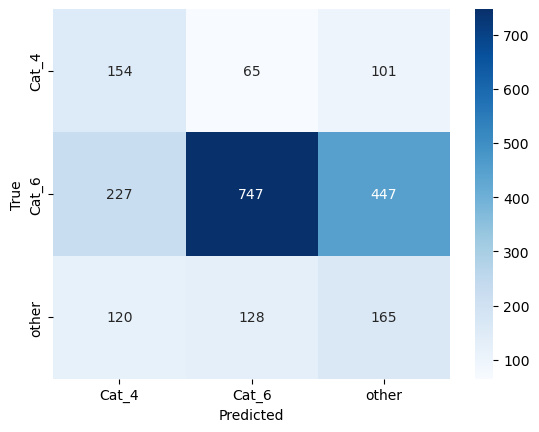

In [563]:
import matplotlib.pyplot as plt
import seaborn as sns
cm = confusion_matrix(y_test_class, y_pred_class)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

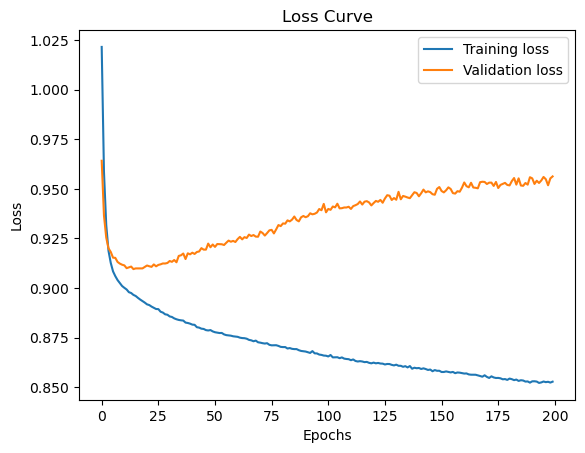

In [564]:
import matplotlib.pyplot as plt
# list all data in history
# Plot the loss curve
plt.plot(history3.history['loss'], label='Training loss')
plt.plot(history3.history['val_loss'], label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.legend()
plt.show()

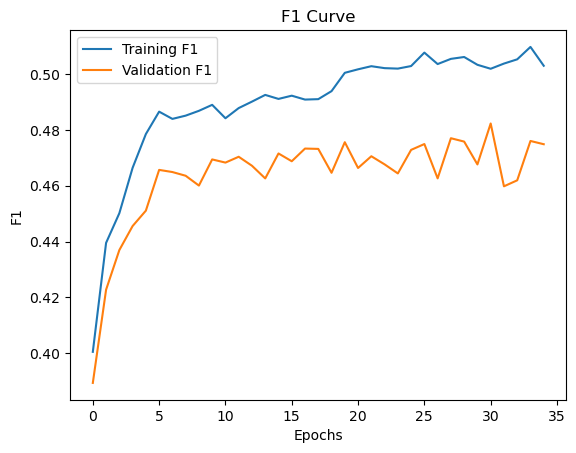

In [565]:
import matplotlib.pyplot as plt
# list all data in history
# Plot the loss curve
plt.plot(history4.history['train_F1'], label='Training F1')
plt.plot(history4.history['val_F1'], label='Validation F1')
plt.xlabel('Epochs')
plt.ylabel('F1')
plt.title('F1 Curve')
plt.legend()
plt.show()

68/68 [==============================] - 0s 911us/step


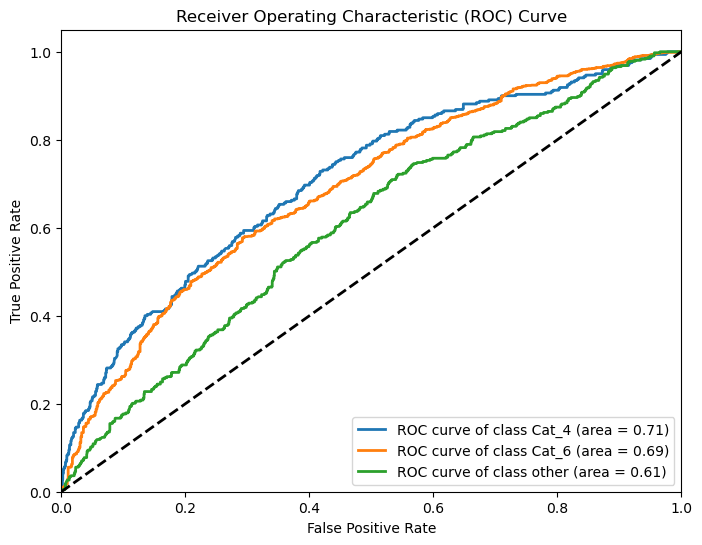

In [566]:
# Predict probabilities for the test data
y_pred_probs = model.predict(X1)
n_classes = len(le.classes_)

# Calculate TPR and FPR for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = Y1.shape[1]
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(Y1[:, i], y_pred_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot the ROC curve
plt.figure(figsize=(8, 6))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'.format(le.classes_[i], roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

#### Optimal threshold for the curve

In [567]:
# Predict probabilities for the test data
y_pred_probs = model.predict(X1)
n_classes = len(le.classes_)

# Calculate TPR and FPR for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = Y1.shape[1]
for i in range(n_classes):
    fpr[i], tpr[i], thresholds = roc_curve(Y1[:, i], y_pred_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
# find the optimal threshold for each class
    optimal_idx = np.argmax(tpr[i] - fpr[i])
    optimal_threshold = thresholds[optimal_idx]
    print("Optimal threshold for class", le.classes_[i], ":", optimal_threshold)

68/68 [==============================] - 0s 912us/step
Optimal threshold for class Cat_4 : 0.29076418
Optimal threshold for class Cat_6 : 0.35937542
Optimal threshold for class other : 0.34968734


## Final Conclusion

If we compare the before and after sampling classification report we can see that sampling was beneficial for improving the performance of the model. In the "Before" results, the precision, recall, and f1-score for the "Cat_4" and "other" categories are quite low, indicating that the model is not correctly identifying those categories. On the other hand, the precision, recall, and f1-score for the "Cat_6" category are high, indicating that the model is performing well in identifying this category.
    
However, after sampling, the results have improved for the "Cat_4" and "other" categories, with increased precision, recall, and f1-score values. This indicates that the model is now performing better at identifying these categories. The precision and f1-score values for the "Cat_6" category have decreased slightly, but the recall has improved. Overall, the accuracy of the model has decreased, but the macro and weighted averages of the precision, recall, and f1-score have improved.

Therefore, sampling was beneficial in this case because it helped improve the overall performance of the model, especially for the categories that were previously underperforming. It also helped balance the dataset, which was originally skewed towards the "Cat_6" category.
